In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. PRÉPARATION DES DONNÉES
print("1. PRÉPARATION DES DONNÉES")

# Définition des villes et des mois
villes = ['Paris', 'Tokyo', 'New York', 'Sydney', 'Moscow', 
          'Dubai', 'Rio', 'Cape Town', 'Stockholm', 'Singapore']
mois = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Génération des données de température
np.random.seed(42)  # Pour la reproductibilité
temperatures = np.random.uniform(low=-5, high=35, size=(10, 12))

# Création du DataFrame
df_temperatures = pd.DataFrame(temperatures, 
                             index=villes, 
                             columns=mois)

print("Aperçu des données:")
print(df_temperatures.head())
print("\n")

1. PRÉPARATION DES DONNÉES
Aperçu des données:
                Jan        Feb        Mar        Apr        May        Jun  \
Paris      9.981605  33.028572  24.279758  18.946339   1.240746   1.239781   
Tokyo     28.297706   3.493564   2.272999   2.336180   7.169690  15.990257   
New York  13.242799  26.407038   2.986951  15.569378  18.696583  -3.141983   
Sydney     7.184551  -1.093115  22.369321  12.606100  -0.118471  14.807076   
Moscow    16.868411   2.394178  33.783385  26.005313  32.579958  30.793094   

                Jul        Aug        Sep        Oct        Nov        Dec  
Paris     -2.676656  29.647046  19.044600  23.322903  -4.176620  33.796394  
Tokyo     12.277801   6.649166  19.474116   0.579754   6.685786   9.654474  
New York  19.301794   1.820965  -2.397936  32.955421  33.625281  27.335894  
Sydney    -3.624459  31.372816   5.351199  21.500891   7.468443  15.802721  
Moscow    18.915999  31.874969  -1.460300   2.839314  -3.190908   8.013213  




In [2]:
# 2. ANALYSE DES DONNÉES
print("2. ANALYSE DES DONNÉES")

# Calcul des moyennes annuelles par ville
moyennes_annuelles = df_temperatures.mean(axis=1)
print("Températures moyennes annuelles par ville:")
print(moyennes_annuelles)
print("\n")

# Identification des villes avec températures extrêmes
ville_plus_chaude = moyennes_annuelles.idxmax()
temp_plus_chaude = moyennes_annuelles.max()
ville_plus_froide = moyennes_annuelles.idxmin()
temp_plus_froide = moyennes_annuelles.min()

print(f"Ville la plus chaude: {ville_plus_chaude} ({temp_plus_chaude:.1f}°C)")
print(f"Ville la plus froide: {ville_plus_froide} ({temp_plus_froide:.1f}°C)")
print("\n")

2. ANALYSE DES DONNÉES
Températures moyennes annuelles par ville:
Paris        15.639539
Tokyo         9.573458
New York     15.533515
Sydney       11.135589
Moscow       16.618052
Dubai        13.815557
Rio          13.191186
Cape Town    17.608070
Stockholm    11.323811
Singapore    16.405255
dtype: float64


Ville la plus chaude: Cape Town (17.6°C)
Ville la plus froide: Tokyo (9.6°C)




3. VISUALISATION DES DONNÉES


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Paris'),
  Text(1, 0, 'Tokyo'),
  Text(2, 0, 'New York'),
  Text(3, 0, 'Sydney'),
  Text(4, 0, 'Moscow'),
  Text(5, 0, 'Dubai'),
  Text(6, 0, 'Rio'),
  Text(7, 0, 'Cape Town'),
  Text(8, 0, 'Stockholm'),
  Text(9, 0, 'Singapore')])

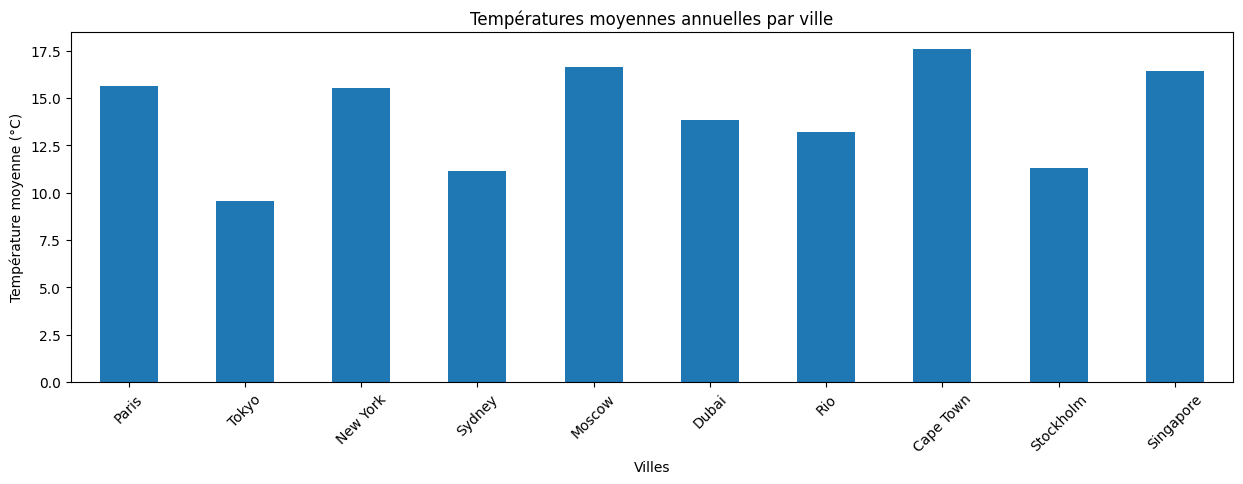

In [3]:
# 3. VISUALISATION DES DONNÉES
print("3. VISUALISATION DES DONNÉES")

# Création d'une figure avec plusieurs sous-graphiques
plt.figure(figsize=(15, 10))

# 1. Graphique des températures moyennes
plt.subplot(2, 1, 1)
moyennes_annuelles.plot(kind='bar')
plt.title('Températures moyennes annuelles par ville')
plt.xlabel('Villes')
plt.ylabel('Température moyenne (°C)')
plt.xticks(rotation=45)

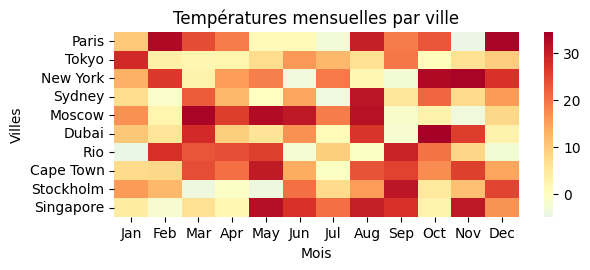

In [4]:
# 2. Heatmap des températures mensuelles
plt.subplot(2, 1, 2)
sns.heatmap(df_temperatures, cmap='RdYlBu_r', center=0)
plt.title('Températures mensuelles par ville')
plt.xlabel('Mois')
plt.ylabel('Villes')

plt.tight_layout()
plt.show()

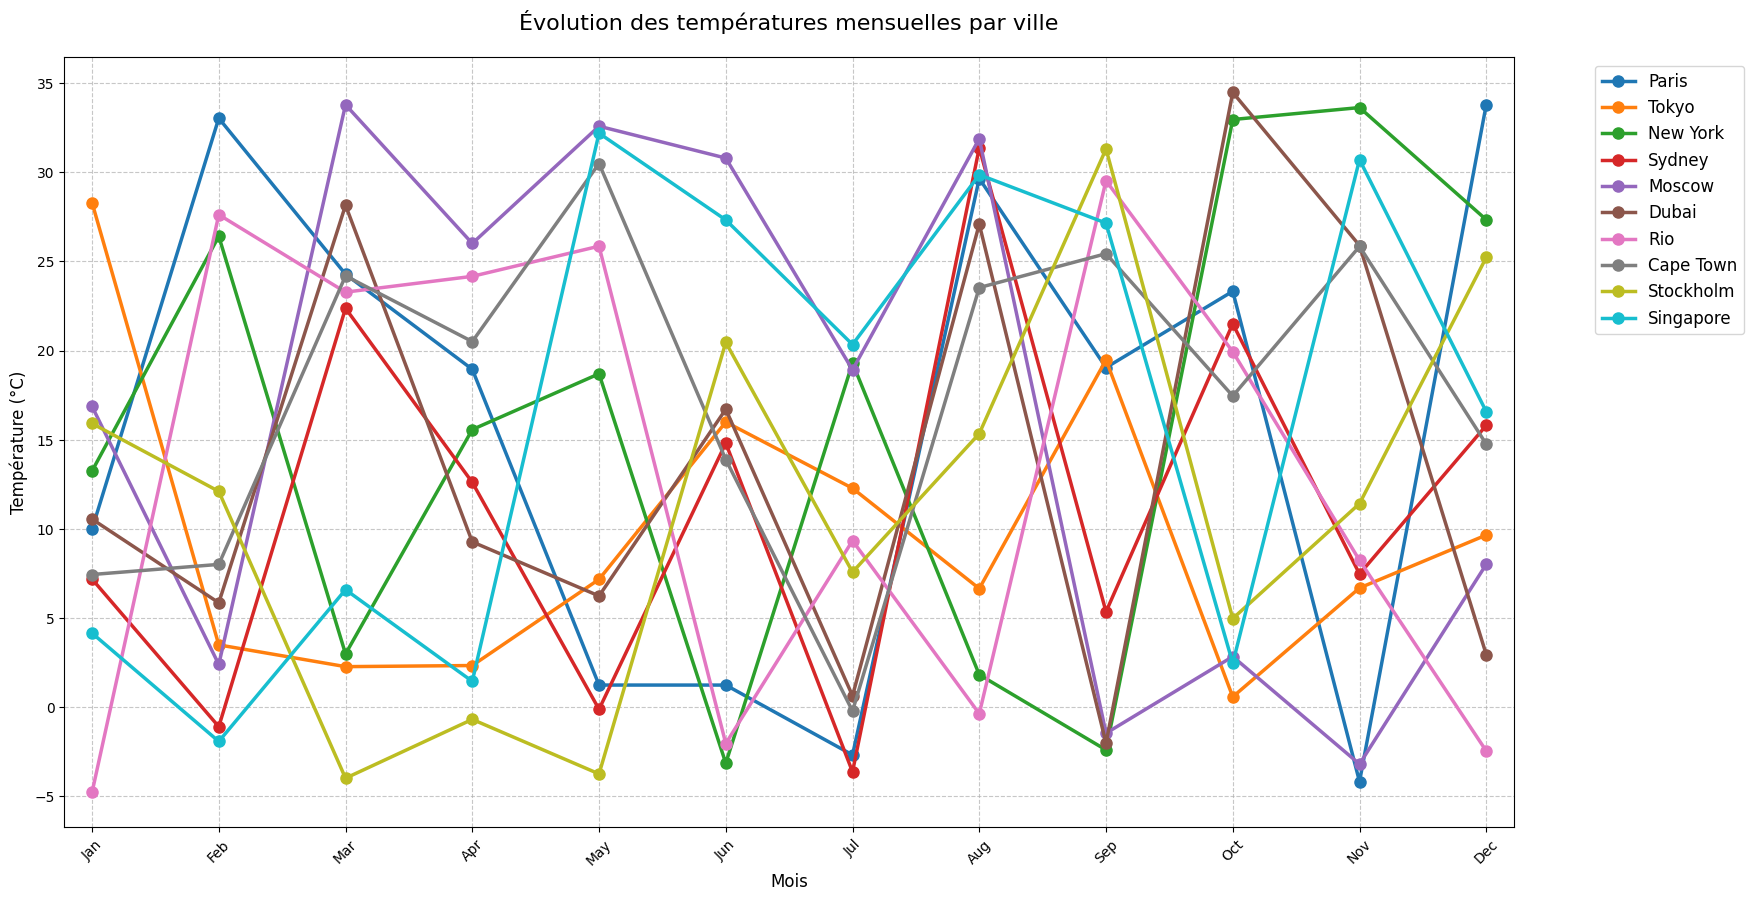

In [8]:
# 3. Graphique linéaire de l'évolution mensuelle par ville
plt.figure(figsize=(20, 10))

# Tracé des lignes pour chaque ville
for ville in villes:
    plt.plot(mois, df_temperatures.loc[ville], marker='o', linewidth=2.5, markersize=8, label=ville)

# Personnalisation du graphique
plt.title('Évolution des températures mensuelles par ville', fontsize=16, pad=20)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Température (°C)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Ajout de marges pour éviter que la légende ne soit coupée
plt.margins(x=0.02)
plt.subplots_adjust(right=0.85)

plt.show()

In [10]:
print("RAPPORT D'ANALYSE DES TEMPÉRATURES")
print("==================================")

print("\n1. RÉSUMÉ GÉNÉRAL")
print(f"- Température moyenne globale: {df_temperatures.mean().mean():.1f}°C")
print(f"- Température maximale enregistrée: {df_temperatures.max().max():.1f}°C")
print(f"- Température minimale enregistrée: {df_temperatures.min().min():.1f}°C")

print("\n2. ANALYSE PAR VILLE")
print(f"- Ville la plus chaude: {ville_plus_chaude} (moyenne: {temp_plus_chaude:.1f}°C)")
print(f"- Ville la plus froide: {ville_plus_froide} (moyenne: {temp_plus_froide:.1f}°C)")

print("\n3. ANALYSE DES TENDANCES MENSUELLES")
# Mois le plus chaud et le plus froid en moyenne
mois_plus_chaud = df_temperatures.mean().idxmax()
mois_plus_froid = df_temperatures.mean().idxmin()
print(f"- Mois le plus chaud en moyenne: {mois_plus_chaud}")
print(f"- Mois le plus froid en moyenne: {mois_plus_froid}")

# Analyse des variations saisonnières
print("\n4. VARIATIONS SAISONNIÈRES")
print("- Tendances observées:")
variations = df_temperatures.max() - df_temperatures.min()
ville_plus_variable = variations.idxmax()
print(f"- Plus grande amplitude thermique observée à {ville_plus_variable}")
print(f"- Villes avec des climats plus stables: {variations.nsmallest(2).index.tolist()}")

print("\n5. GROUPES DE CLIMATS")
# Classement des villes par type de climat basé sur les moyennes
moyennes_triees = moyennes_annuelles.sort_values(ascending=False)
print("Classification des villes par température moyenne:")
for i, (ville, temp) in enumerate(moyennes_triees.items(), 1):
    print(f"{i}. {ville}: {temp:.1f}°C")



RAPPORT D'ANALYSE DES TEMPÉRATURES

1. RÉSUMÉ GÉNÉRAL
- Température moyenne globale: 14.1°C
- Température maximale enregistrée: 34.5°C
- Température minimale enregistrée: -4.8°C

2. ANALYSE PAR VILLE
- Ville la plus chaude: Cape Town (moyenne: 17.6°C)
- Ville la plus froide: Tokyo (moyenne: 9.6°C)

3. ANALYSE DES TENDANCES MENSUELLES
- Mois le plus chaud en moyenne: Aug
- Mois le plus froid en moyenne: Jul

4. VARIATIONS SAISONNIÈRES
- Tendances observées:
- Plus grande amplitude thermique observée à Nov
- Villes avec des climats plus stables: ['Jul', 'Apr']

5. GROUPES DE CLIMATS
Classification des villes par température moyenne:
1. Cape Town: 17.6°C
2. Moscow: 16.6°C
3. Singapore: 16.4°C
4. Paris: 15.6°C
5. New York: 15.5°C
6. Dubai: 13.8°C
7. Rio: 13.2°C
8. Stockholm: 11.3°C
9. Sydney: 11.1°C
10. Tokyo: 9.6°C
